In [2]:
#import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
import os

## Commits and contributors

### Processing raw files

In [3]:
#combine all raw files into one

os.makedirs("Data", exist_ok=True)
read_files = glob.glob("Raw/Commit/*.txt")
combined_content = ""

for i, f in enumerate(read_files):
    with open(f, "r") as infile:
        content = infile.read()
        if i > 0:
            content = content.lstrip().lstrip('[')
        if i < len(read_files) - 1:
            content = content.rstrip().rstrip(']') + ','
        combined_content += content
if(os.path.exists("Data/Commit/") == False): os.mkdir("Data/Commit")
with open("Data/Commit/rawFile.txt", "w") as outfile:
    outfile.write(combined_content)

In [4]:
#read raw.txt file
rawCommit = pd.read_json("Data/Commit/rawFile.txt") 

In [5]:
#split the data in 'commit' column
formatedCommit = pd.json_normalize(rawCommit.commit)
#clear useless data
formatedCommit = formatedCommit.filter(['author.name', 'committer.date'])
#format committer date into date format
formatedCommit['committer.date'] = pd.to_datetime(formatedCommit['committer.date'].str.slice(0, 10))
#sort by date
formatedCommit = formatedCommit.sort_values(by = 'committer.date')
#export to csv file
formatedCommit.to_csv('Data/Commit/clearedFile.csv', index = False)
#print the result
formatedCommit.set_index('author.name', inplace = True)
print(formatedCommit)

                     committer.date
author.name                        
Tim Neutkens             2024-03-19
vercel-release-bot       2024-03-19
Zack Tanner              2024-03-19
vercel-release-bot       2024-03-19
Rafael Fernandes         2024-03-19
...                             ...
vercel-release-bot       2024-06-05
Zack Tanner              2024-06-05
Sebastian Silbermann     2024-06-05
Vercel Release Bot       2024-06-06
Maikel                   2024-06-06

[1000 rows x 1 columns]


### Commits

In [6]:
#Times of commit per day
date = formatedCommit["committer.date"].groupby(pd.to_datetime(formated['committer.date'])).count()
plt.plot(date.index, date.values)
plt.xlabel('Date')
plt.ylabel('Commit times')
plt.title('Times of commit per Day')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.xticks(rotation=270, fontweight='light',  fontsize='x-small')
plt.show()

NameError: name 'formated' is not defined

### Contributors

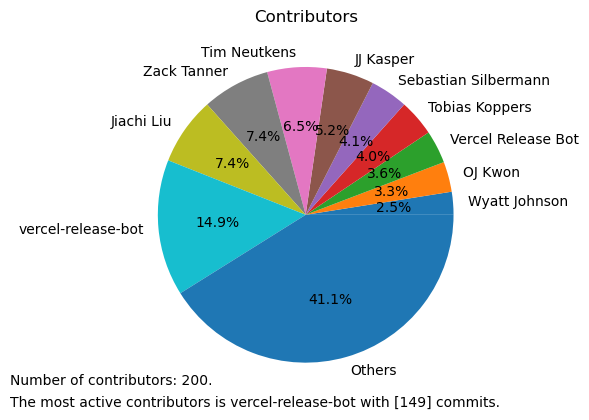

In [ ]:
#Contributor
contri = formatedCommit.pivot_table(index = 'author.name', values = 'committer.date', aggfunc = 'count')
contri = contri.sort_values(by='committer.date')
contri
contri2 = contri[-10:].copy()
contri2.loc['Others'] = contri[:-10].sum()
plt.text(-2, -1.15, f'Number of contributors: {len(contri)}.')
plt.text(-2, -1.3, f'The most active contributors is {contri.index[-1]} with {contri.values[-1]} commits.')
plt.pie(contri2['committer.date'], labels=contri2.index, autopct='%1.1f%%')
plt.title('Contributors')
plt.show()

/tmp/ipykernel_8982/3178580474.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if top20Contri['time'][i] == top20Contri['time'][-1]:
/tmp/ipykernel_8982/3178580474.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(-3, -30, f'Longest contributor time: {mostContriString} with {top20Contri["time"][-1]} days.')
/home/bang/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bang/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning

Jiachi Liu, JJ Kasper, Zack Tanner, Tobias Koppers, vercel-release-bot


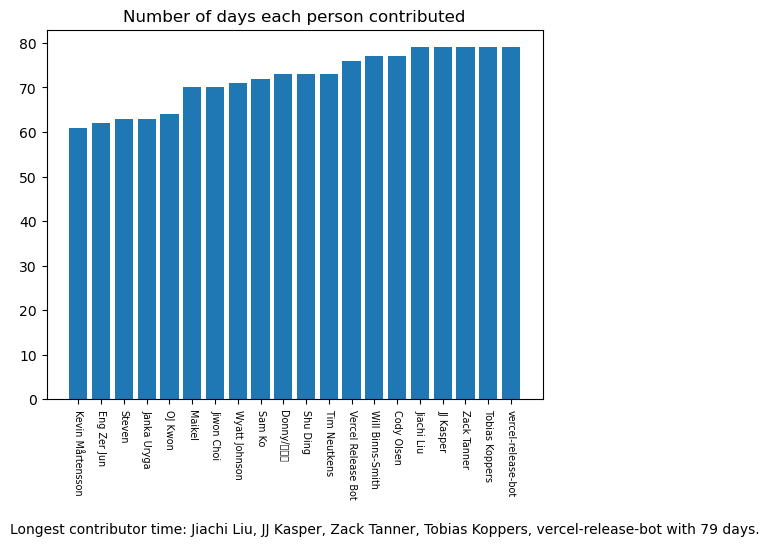

In [ ]:
contriTime = formatedCommit.sort_values(by = ['author.name', 'committer.date'], ascending = [True, True])[[ 'committer.date']]
firstContri = contriTime[~contriTime.index.duplicated(keep='first')]
lastContri = contriTime[~contriTime.index.duplicated(keep='last')]
contriTime = pd.merge(firstContri, lastContri, right_index=True, left_index=True, suffixes=('_first', '_last'))
contriTime['time'] = (contriTime['committer.date_last'] - contriTime['committer.date_first']).dt.days +1
contriTime = contriTime.sort_values(by = 'time')
top20Contri = contriTime[-20:].copy()
plt.subplot().bar(x = top20Contri.index, height = top20Contri['time'])
plt.xticks(rotation=270, fontweight='light',  fontsize='x-small')
plt.title("Number of days each person contributed")
mostContriString = ""
for i in range (0, len(top20Contri) - 1) :
    if top20Contri['time'][i] == top20Contri['time'][-1]:
        mostContriString += top20Contri.index[i] + ", "
mostContriString += top20Contri.index[-1]
print (mostContriString)
plt.text(-3, -30, f'Longest contributor time: {mostContriString} with {top20Contri["time"][-1]} days.')
plt.show()

/tmp/ipykernel_8982/1749155260.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  freq30daysmore = freq[contriTime['time'] > 30]
/tmp/ipykernel_8982/1749155260.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(-5, -0.8, f'Most frequency contributor: {freq30daysmore.index[-1]} with {freq30daysmore["freq"][-1]:.2f} commits/day.')
/home/bang/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bang/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bang/miniforge3/lib/pyth

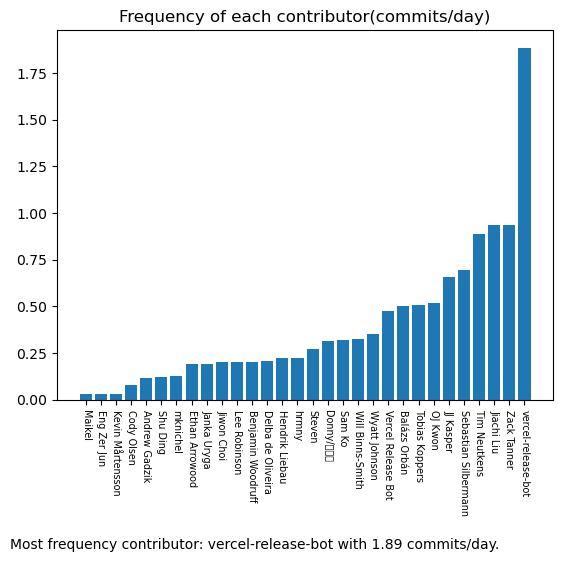

In [ ]:
freq = pd.merge(contri, contriTime, on='author.name', suffixes=('_contr', '_time'))
freq["freq"] = freq["committer.date"] / freq["time"]
freq.to_csv('Data/Commit/finalFile.csv', index = False)
freq30daysmore = freq[contriTime['time'] > 30]
freq30daysmore = freq30daysmore.sort_values(by = 'freq')
plt.subplot().bar(x = freq30daysmore.index, height = freq30daysmore['freq'])
plt.xticks(rotation=270, fontweight='light',  fontsize='x-small')
plt.title("Frequency of each contributor(commits/day)")
plt.text(-5, -0.8, f'Most frequency contributor: {freq30daysmore.index[-1]} with {freq30daysmore["freq"][-1]:.2f} commits/day.')
plt.show()

## Issues

### Processing raw files

In [19]:
#combine all raw files into one

os.makedirs("Data", exist_ok=True)
read_files = glob.glob("Raw/Issue/*.txt")
combined_content = ""

for i, f in enumerate(read_files):
    with open(f, "r") as infile:
        content = infile.read()
        if i > 0:
            content = content.lstrip().lstrip('[')
        if i < len(read_files) - 1:
            content = content.rstrip().rstrip(']') + ','
        combined_content += content
if(os.path.exists("Data/Issue/") == False): os.mkdir("Data/Issue")
with open("Data/Issue/rawFile.txt", "w") as outfile:
    outfile.write(combined_content)

In [20]:
#read raw.txt file
rawIssue = pd.read_json("Data/Issue/rawFile.txt") 
formatedIssue = rawIssue[['title', 'created_at', 'closed_at']]
formatedIssue['created_at'] = pd.to_datetime(formatedIssue['created_at'].astype(str).str.slice(0, 10))
formatedIssue['closed_at'] = pd.to_datetime(formatedIssue['closed_at'].astype(str).str.slice(0, 10))
formatedIssue.set_index('title', inplace = True)
formatedIssue = formatedIssue.sort_values(by = 'created_at')
formatedIssue.to_csv('Data/Issue/clearedFile.csv', index = False)

/tmp/ipykernel_5386/1436044747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatedIssue['created_at'] = pd.to_datetime(formatedIssue['created_at'].astype(str).str.slice(0, 10))
/tmp/ipykernel_5386/1436044747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formatedIssue['closed_at'] = pd.to_datetime(formatedIssue['closed_at'].astype(str).str.slice(0, 10))


### Issues

/tmp/ipykernel_5386/3227468260.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  timeSolve['timeSolve'][0] = formatedIssue[formatedIssue['timeSolve'] == 0]['timeSolve'].count()
/tmp/ipykernel_5386/3227468260.py:5: FutureWarning: Series.__s

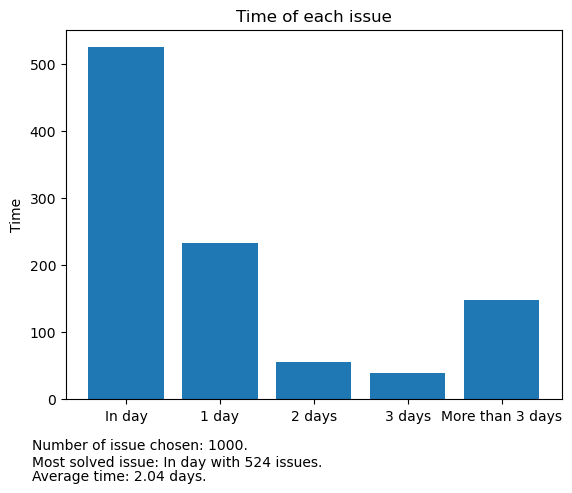

In [41]:
formatedIssue['timeSolve'] = (formatedIssue['closed_at'] - formatedIssue['created_at']).dt.days
timeSolve = pd.DataFrame()
timeSolve.index = ['In day', '1 day', '2 days', '3 days', 'More than 3 days']
timeSolve['timeSolve'] = [formatedIssue[formatedIssue['timeSolve'] == 0].count(), 0, 0, 0, 0]
timeSolve['timeSolve'][0] = formatedIssue[formatedIssue['timeSolve'] == 0]['timeSolve'].count() 
timeSolve['timeSolve'][1] = formatedIssue[formatedIssue['timeSolve'] == 1]['timeSolve'].count()
timeSolve['timeSolve'][2] = formatedIssue[formatedIssue['timeSolve'] == 2]['timeSolve'].count()
timeSolve['timeSolve'][3] = formatedIssue[formatedIssue['timeSolve'] == 3]['timeSolve'].count()
timeSolve['timeSolve'][4] = formatedIssue[formatedIssue['timeSolve'] > 3]['timeSolve'].count()
plt.subplot().bar(x = timeSolve.index, height = timeSolve['timeSolve'])
plt.ylabel('Time (days)')
plt.title('Time of each issue')
plt.text(-1, -75, f'Number of issue chosen: {len(formatedIssue)}.')
plt.text(-1, -100, f'Most solved issue: {timeSolve["timeSolve"].idxmax()} with {timeSolve["timeSolve"].max()} issues.')
plt.text(-1, -120, f'Average time: {formatedIssue["timeSolve"].mean()} days.')
formatedIssue.to_csv('Data/Issue/finalFile.csv', index = False)

## Pull requests

### Processing raw file

In [42]:
#combine all raw files into one

os.makedirs("Data", exist_ok=True)
read_files = glob.glob("Raw/Pull/*.txt")
combined_content = ""

for i, f in enumerate(read_files):
    with open(f, "r") as infile:
        content = infile.read()
        if i > 0:
            content = content.lstrip().lstrip('[')
        if i < len(read_files) - 1:
            content = content.rstrip().rstrip(']') + ','
        combined_content += content
if(os.path.exists("Data/Pull/") == False): os.mkdir("Data/Pull")
with open("Data/Pull/rawFile.txt", "w") as outfile:
    outfile.write(combined_content)

In [43]:
#read raw.txt file
rawPull = pd.read_json("Data/Pull/rawFile.txt") 
# rawPull.to_csv('Data/Pull/clearedFile.csv', index = False)
formatedPull = rawPull.filter(['title', 'created_at', 'merged_at'])
formatedPull.set_index('title', inplace = True)
formatedPull.to_csv('Data/Pull/clearedFile.csv', index = False)



/tmp/ipykernel_5386/2530808307.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  totalPullRequest['merged'][0] = formatedPull[formatedPull['merged'] == True]['merged'].count()
/tmp/ipykernel_5386/2530808307.py:7: FutureWarning: Series.__se

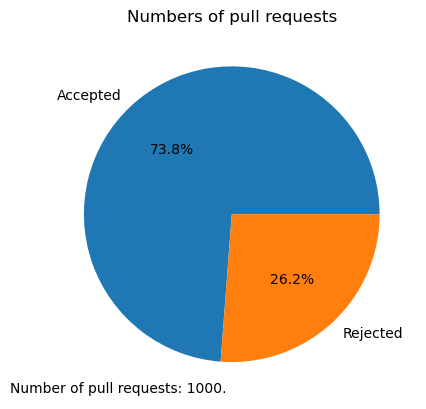

In [44]:
formatedPull.columns
formatedPull['merged'] = formatedPull['merged_at'].notna()
formatedPull
totalPullRequest = pd.DataFrame()
totalPullRequest.index = ['Accepted', 'Rejected']
totalPullRequest['merged'] = [0, 0]
totalPullRequest['merged'][0] = formatedPull[formatedPull['merged'] == True]['merged'].count()
totalPullRequest['merged'][1] = formatedPull[formatedPull['merged'] == False]['merged'].count()
plt.pie(totalPullRequest['merged'], labels=totalPullRequest.index, autopct='%1.1f%%')
plt.title("Numbers of pull requests")
plt.text(-1.5, -1.2, f'Number of pull requests: {len(formatedPull)}.')
plt.show()

/tmp/ipykernel_5386/3735307925.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  timePull['time'][0] = acceptedPull[acceptedPull['time'] == 0]['time'].count()
/tmp/ipykernel_5386/3735307925.py:10: FutureWarning: Series.__setitem__ treatin

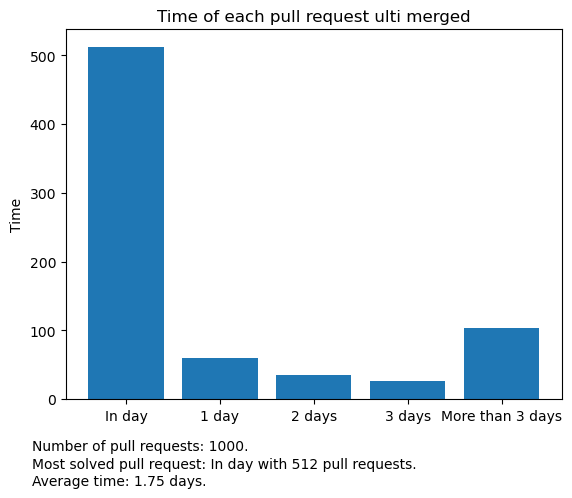

In [45]:

formatedPull['time'] = (formatedPull['merged_at'] - formatedPull['created_at']).dt.days
acceptedPull = formatedPull[formatedPull['merged'] == True]


acceptedPull

timePull = pd.DataFrame()
timePull.index = ['In day', '1 day', '2 days', '3 days', 'More than 3 days']
timePull['time'] = [0, 0, 0, 0, 0]
timePull['time'][0] = acceptedPull[acceptedPull['time'] == 0]['time'].count() 
timePull['time'][1] = acceptedPull[acceptedPull['time'] == 1]['time'].count()
timePull['time'][2] = acceptedPull[acceptedPull['time'] == 2]['time'].count()
timePull['time'][3] = acceptedPull[acceptedPull['time'] == 3]['time'].count()
timePull['time'][4] = acceptedPull[acceptedPull['time'] > 3]['time'].count()
plt.subplot().bar(x = timePull.index, height = timePull['time'])
plt.ylabel('Time (days)')
plt.title('Time of each pull request ulti merged')
plt.text(-1, -75, f'Number of pull requests: {len(formatedPull)}.')
plt.text(-1, -100, f'Most solved pull request: {timePull["time"].idxmax()} with {timePull["time"].max()} pull requests.')
plt.text(-1, -125, f'Average time: {acceptedPull["time"].mean():.2f} days.')
formatedPull.to_csv('Data/Pull/finalFile.csv', index = False)



## Languages

In [54]:
#combine all raw files into one

os.makedirs("Data", exist_ok=True)
read_files = glob.glob("Raw/Languages/*.txt")
combined_content = ""

for i, f in enumerate(read_files):
    with open(f, "r") as infile:
        content = infile.read()
        if i > 0:
            content = content.lstrip().lstrip('[')
        if i < len(read_files) - 1:
            content = content.rstrip().rstrip(']') + ','
        combined_content += content
if(os.path.exists("Data/Languages/") == False): os.mkdir("Data/Languages")
with open("Data/Languages/rawFile.txt", "w") as outfile:
    outfile.write(combined_content)

Text(-1.2, -1.2, 'JavaScript is most used in this repo, with 29790821 bytes of code.')

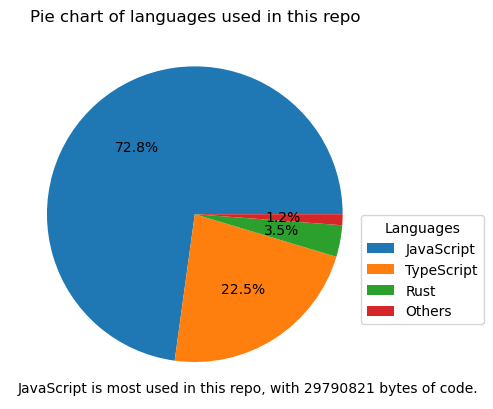

In [112]:

formatedLang = pd.read_json("Data/Languages/rawFile.txt",  typ='series')
formatedLang.to_csv("Data/Languages/finalFile.csv")
pieLang = formatedLang[:3]
pieLang['Others'] = formatedLang[3:].sum()
plt.pie(pieLang.values, autopct='%1.1f%%')
plt.subplot().legend(
    labels = pieLang.index,
    title='Languages',
    loc = 'center right',
    bbox_to_anchor = (1, 0, 0.3, 0.7)
)
plt.title("Pie chart of languages used in this repo")
plt.text(-1.2, -1.2, f'{formatedLang.idxmax()} is most used in this repo, with {formatedLang.max()} bytes of code.')


## Contents

In [113]:
#combine all raw files into one

os.makedirs("Data", exist_ok=True)
read_files = glob.glob("Raw/Content/*.txt")
combined_content = ""

for i, f in enumerate(read_files):
    with open(f, "r") as infile:
        content = infile.read()
        if i > 0:
            content = content.lstrip().lstrip('[')
        if i < len(read_files) - 1:
            content = content.rstrip().rstrip(']') + ','
        combined_content += content
if(os.path.exists("Data/Content/") == False): os.mkdir("Data/Content")
with open("Data/Content/rawFile.txt", "w") as outfile:
    outfile.write(combined_content)

In [116]:
formatedCon = pd.read_json("Data/Content/rawFile.txt")
formatedCon.to_csv('Data/Content/clearedFile.csv')